In [29]:
import pandas as pd
import numpy as np

from skimage.io import imread, imshow
from skimage import img_as_float
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
def save(name, data):
    print "save", name, ":", data
    with open(name, 'w') as f:
        f.write(data)

In [12]:
image = imread('parrots.jpg')
fimage = img_as_float(image)

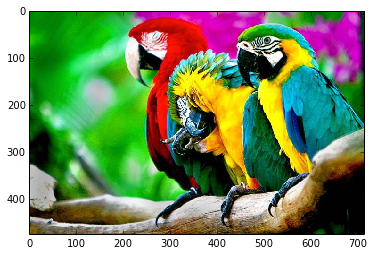

In [21]:
imshow(image)

In [23]:
w, h, d = original_shape = tuple(fimage.shape)
assert d == 3
image_array = np.reshape(fimage, (w * h, d))

In [63]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

def getDiff(A, B):
    mse = np.mean((A - B) ** 2)
    psnr = 10 * np.log10(1.0 / mse)
    return mse, psnr

5 0.0276002656841 15.5908673733
6 0.0218442700317 16.606624635
7 0.0169866936051 17.6989114666
8 0.0141758220405 18.4845174744
9 0.0121150261219 19.1667564512
10 0.0107233538953 19.6966936106
11 0.00958964324649 20.1819754913
save 6_1 : 11


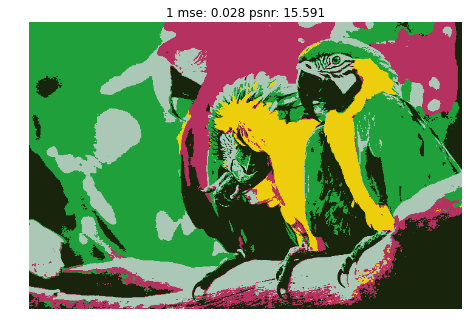

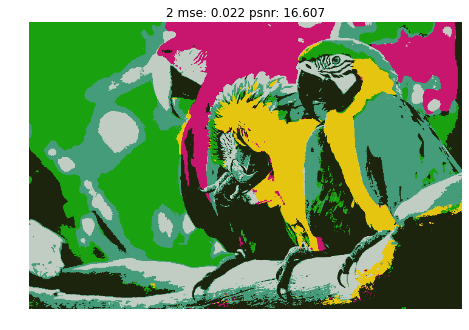

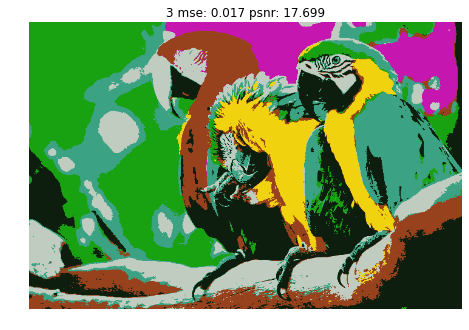

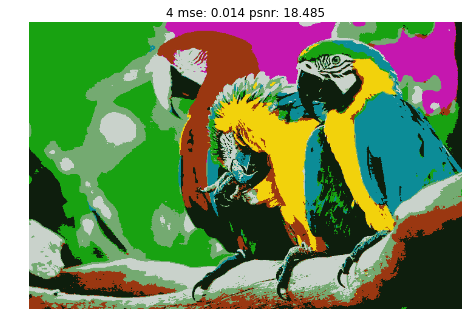

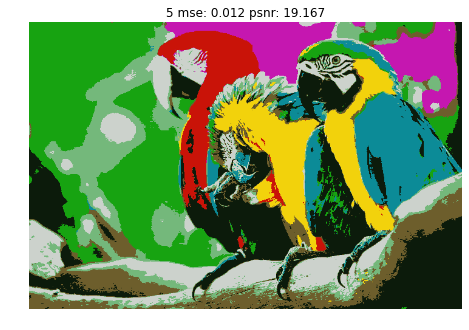

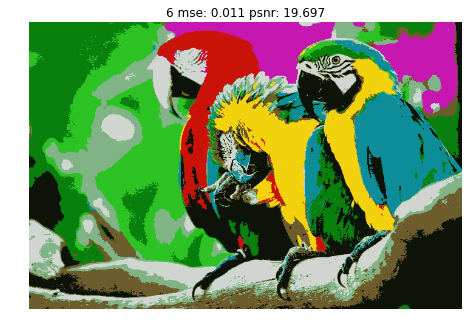

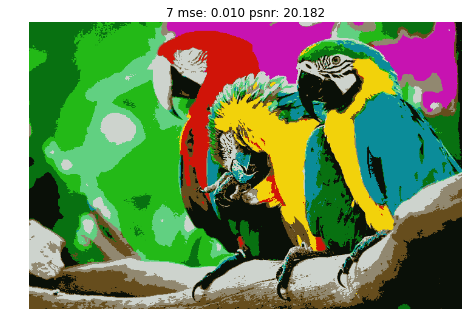

In [67]:
figure = 1
for c in range(5,21):
    kmeans = KMeans(n_clusters=c, init='k-means++', random_state=241).fit(image_array)
    reduced_image = recreate_image(kmeans.cluster_centers_, kmeans.labels_, w, h)
    mse, psnr = getDiff(fimage, reduced_image)
    print c, mse, psnr
    
    plt.figure(figure)
    plt.clf()
    ax = plt.axes([0, 0, 1, 1])
    plt.axis('off')
    plt.title("%i mse: %.3f psnr: %.3f" % (figure, mse, psnr))
    plt.imshow(reduced_image)
    figure += 1
    if psnr > 20:
        save("6_1", str(c))
        break
plt.show()